In [1]:
#导入库
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance_matrix, ConvexHull
import random
from random import choice
import os
from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

# 修改plt默认图形大小
plt.rcParams['figure.figsize'] = [5, 5]
# 修改默认字体大小
plt.rcParams['font.size'] = 12
# 修改默认坐标轴标签的字体
plt.rcParams['axes.labelsize'] = 10

In [17]:
#调整角点识别参数
def gfttp(paramter1, paramter2, paramter3, paramter4, paramter5, paramter6):
    print(f'maxCorners要检测的最大角点数目。如果超过此数目，将返回最强的角点: {paramter1}')
    print(f'qualityLevel角点的质量水平阈值。范围是0到1之间，表示角点质量的最小阈值: {paramter2}')
    print(f'minDistance两个角点之间的最小欧几里德距离。如果两个角点的距离小于此值，则只有其中一个会被保留: {paramter3}')
    print(f'blockSize：角点检测时的窗口大小。这个参数影响角点检测的精度: {paramter4}')
    print(f'useHarrisDetector一个布尔值，如果为True，则使用Harris角点检测器，如果为False，则使用Shi-Tomasi角点检测器: {paramter5}')
    print(f'k：Harris角点检测器的自由参数k。它影响角点响应函数的灵敏度，一般是0.04，减小能使检测器更灵敏: {paramter6} ')
    return paramter1, paramter2, paramter3, paramter4, paramter5, paramter6

interactive_plot = interactive(gfttp, paramter1=(0,500,1), 
                               paramter2=(0.000,0.100,0.001),
                               paramter3=(1,50,1), 
                               paramter4=(1,10,1),
                               paramter5=(0,1,1),
                               paramter6=(0.00,0.10,0.01))
interactive_plot.children[0].value = 100
interactive_plot.children[1].value = 0.030
interactive_plot.children[2].value = 5
interactive_plot.children[3].value = 3
interactive_plot.children[4].value = 1
interactive_plot.children[5].value = 0.04
interactive_plot

interactive(children=(IntSlider(value=100, description='paramter1', max=500), FloatSlider(value=0.03, descript…

image_read


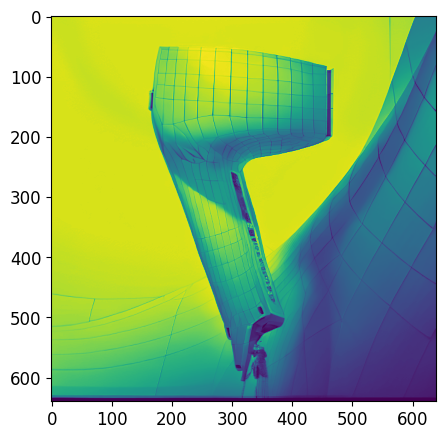

281 0.009000000000000001 7 3 1 0.01
检测到角点数目 123


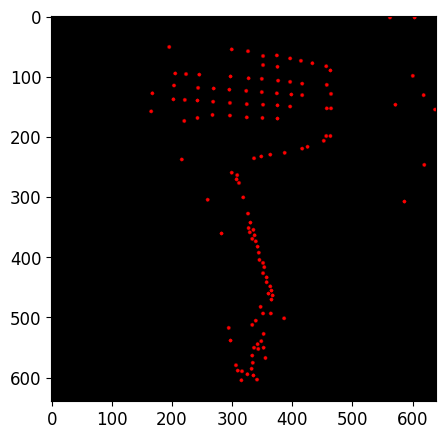

In [25]:
# 读取图像
img = cv2.imread('in11.png')
if img is None:
    print("no_image")
    sys.exit()
else:
    print("image_read")
# 转为灰度图像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
# 角点检测
p1,p2,p3,p4,p5,p6=interactive_plot.result
print(p1,p2,p3,p4,p5,p6)
corners = cv2.goodFeaturesToTrack(gray, maxCorners=p1, qualityLevel=p2, minDistance=p3, blockSize=int(p4), useHarrisDetector=p5, k=p6)
corners = np.intp(corners)  # 转换为整数坐标
print('检测到角点数目',len(corners))
height, width, _ = img.shape
blank_image = np.zeros((height, width, 3), dtype=np.uint8)
for corner in corners:
    x, y = corner.ravel()  # 将角点坐标展平
    cv2.circle(blank_image, (x, y), 3, 255, -1)  # 在角点位置绘制圆
plt.imshow(blank_image)
plt.show()


In [5]:
# 将corners转换为字符串，每个元素占一行，x和y坐标由逗号分隔
corners_str = '\n'.join([','.join(map(str, corner[0])) for corner in corners])

# 打开一个文件，如果不存在则创建
file = open("corners.txt", "w")

# 写入数据
file.write(corners_str)

# 关闭文件
file.close()


In [26]:
#调整线段识别参数
def hlpp(paramter1, paramter2, paramter3, paramter4, paramter5):
    print(f'rho：极坐标中的距离精度，通常设置为1像素: {paramter1}')
    print(f'theta：极坐标中的角度精度，通常设置为π/180，表示1度: {paramter2}')
    print(f'threshold：阈值，用于确定一条直线所需的最小投票数。只有在投票数超过这个阈值时，直线才会被检测到: {paramter3}')
    print(f'blockSize：minLineLength：线段的最小长度。小于此长度的线段将被忽略: {paramter4}')
    print(f'maxLineGap：在两条线段之间认为是一条直线的最大距离。如果两条线段之间的距离小于此值，它们将被合并成一条直线: {paramter5}')
    return paramter1, paramter2, paramter3, paramter4, paramter5

interactive_hlpp = interactive(hlpp, paramter1=(0,10,1), 
                               paramter2=(0,0.3141592653589793,0.017453292519943295),
                               paramter3=(0,100,1), 
                               paramter4=(0,100,1),
                               paramter5=(0,100,1))
interactive_hlpp.children[0].value = 1
interactive_hlpp.children[1].value = 0.017453292519943295
interactive_hlpp.children[2].value = 50
interactive_hlpp.children[3].value = 20
interactive_hlpp.children[4].value = 5
interactive_hlpp

interactive(children=(IntSlider(value=1, description='paramter1', max=10), FloatSlider(value=0.017453292519943…

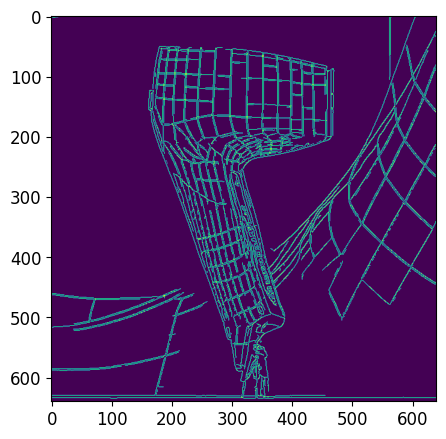

there is 360 lines detected
[[[110 634 319 634]]

 [[ 12   0 605   0]]

 [[  0 630 240 630]]

 ...

 [[454 419 484 393]]

 [[398 145 398 120]]

 [[326 220 346 214]]]


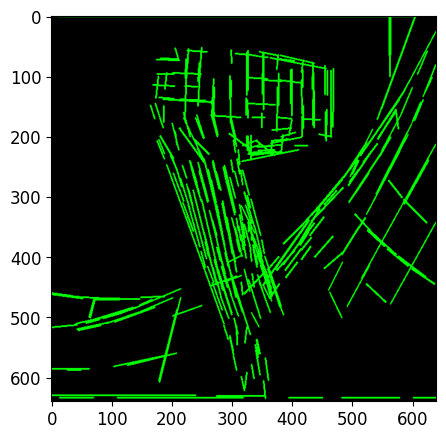

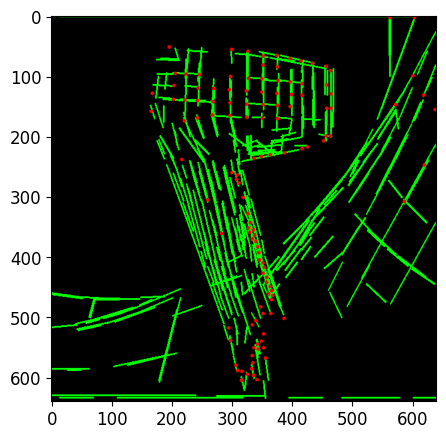

In [27]:

edges = cv2.Canny(gray, 40, 190, apertureSize=3)
plt.imshow(edges)
plt.show()
# 使用Hough变换检测直线
hlp1,hlp2,hlp3,hlp4,hlp5=interactive_hlpp.result
lines = cv2.HoughLinesP(edges, rho=hlp1, theta=hlp2, threshold=hlp3, minLineLength=hlp4, maxLineGap=hlp5)
if lines is None:
    print("change_phramaters")
    sys.exit()
else:
    print("there is "+str(len(lines))+" lines detected")  
    print(lines)
height, width, _ = img.shape
blank_image = np.zeros((height, width, 3), dtype=np.uint8)   
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(blank_image)
plt.show()
for corner in corners:
    x, y = corner.ravel()  # 将角点坐标展平
    cv2.circle(blank_image, (x, y), 3, 255, -1)  # 在角点位置绘制圆
plt.imshow(blank_image)
plt.show()

    


In [28]:
# 假设points1和lines2是你的输入数据
points1=corners
points1 = np.squeeze(points1)
# 计算所有点之间的距离
distances = distance_matrix(points1, points1)
#lines2 = np.random.rand(500, 2, 2)  # 500条线段的端点
lines2=lines
lines2=lines2.reshape(-1, 2)
lines2=lines2.reshape(-1, 2, 2)


# 对每个点，找到最近的6个点，并生成线段
lines1 = []
for i in range(len(points1)):
    nearest_indices = np.argsort(distances[i])[:15]  # 包括自己，所以取7个
    for j in nearest_indices:
        if i != j:  # 排除自己
            lines1.append(np.array([points1[i], points1[j]]))
lines1=np.array(lines1)

print(lines1.shape)
print(lines2.shape)

(1722, 2, 2)
(360, 2, 2)


In [29]:
# 计算两点之间的距离
def calculate_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 计算两线段的角度
def calculate_angle(p1, p2):
    return math.degrees(math.atan2(p2[1] - p1[1], p2[0] - p1[0]))

# 计算点到线段的最短距离
def point_to_line_distance(point, line):
    p1, p2 = line
    line_vector = np.array(p2) - np.array(p1)
    point_vector = np.array(point) - np.array(p1)
    line_length = np.linalg.norm(line_vector)
    unit_line_vector = line_vector / line_length
    projected_point_length = np.dot(point_vector, unit_line_vector)
    if projected_point_length < 0:
        return calculate_distance(point, p1)
    elif projected_point_length > line_length:
        return calculate_distance(point, p2)
    else:
        projected_point = p1 + projected_point_length * unit_line_vector
        return calculate_distance(point, projected_point)

# 判断两线段的一致性
def check_consistency(line1, line2):
    # 判断角度差
    angle1 = calculate_angle(*line1)
    angle2 = calculate_angle(*line2)
    if abs(angle1 - angle2) > 4:
        return False

    # 判断线段1上所有点到线段2的垂直距离
    for point in line1:
        if point_to_line_distance(point, line2) > 20:
            return False

    # 判断以线段为直径的圆的关系
    c1 = [(line1[0][0]+line1[1][0])/2, (line1[0][1]+line1[1][1])/2]
    c2 = [(line2[0][0]+line2[1][0])/2, (line2[0][1]+line2[1][1])/2]
    r1 = calculate_distance(line1[0], line1[1]) / 2
    r2 = calculate_distance(line2[0], line2[1]) / 2
    d = calculate_distance(c1, c2)
    if d > r1 + r2:
        return False

    return True
def find_matching_lines(lines1, lines2):
    lines3 = []
    for line1 in lines1:
        for line2 in lines2:
            if check_consistency(line1, line2):
                lines3.append(line1)
                break
    return lines3


In [30]:
lines3=find_matching_lines(lines1, lines2)

(231, 1, 4) 231
(231, 4) 231
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


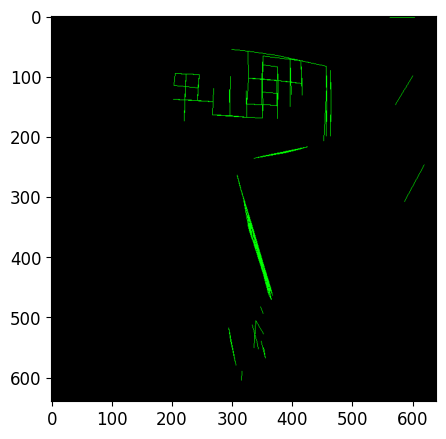

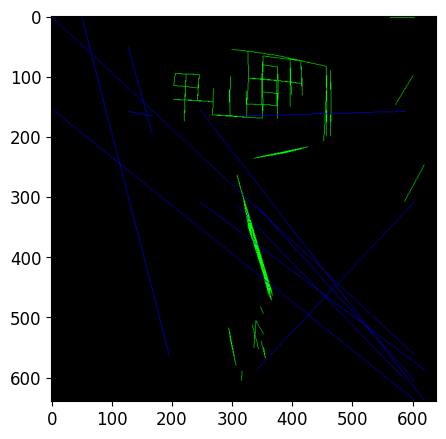

In [35]:
# 计算lines1和lines2中所有线段的相似度，并输出到lines3中
'''
lines3 = []
for line1 in lines1:
    for line2 in lines2:
        # 使用上一个回答中的相似度判断标准
        direction1 = np.arctan2(line1[1, 1] - line1[0, 1], line1[1, 0] - line1[0, 0])
        direction2 = np.arctan2(line2[1, 1] - line2[0, 1], line2[1, 0] - line2[0, 0])
        direction_difference = np.abs(direction1 - direction2)
        if direction_difference > np.pi:
            direction_difference = 2 * np.pi - direction_difference
        if direction_difference <= 2 * np.pi / 180:
            distances = []
            for point in line1:
                distance = np.abs(np.cross(line2[1]-line2[0], line2[0]-point))/np.linalg.norm(line2[1]-line2[0])
                distances.append(distance)
            if max(distances) <= 5:
                lines3.append(line1)
                break  # 如果找到一条匹配的线段，就不再继续搜索
'''
lines3 = np.array(lines3)
print(lines3.shape,len(lines3))
height, width, _ = img.shape
blank_image = np.zeros((height, width, 3), dtype=np.uint8)
lines3=lines3.reshape(-1, 4)
print(lines3.shape,len(lines3))
height, width, _ = img.shape
blank_image = np.zeros((height, width, 3), dtype=np.uint8)
for line in lines3:
    x1, y1, x2, y2 = line
    cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 1)
    print('1')
plt.imshow(blank_image)
plt.show()
cornersout=corners.reshape(-1,2)
hull = ConvexHull(cornersout)
lines5 = []
for simplex in hull.simplices:
    lines5.append([cornersout[simplex, 0], cornersout[simplex, 1]])
lines5=np.array(lines5)
lines5=lines5.reshape(-1,4)
for line in lines5:
    x1, y1, x2, y2 = line
    cv2.line(blank_image, (x1, y1), (x2, y2), (0, 0, 255), 1)
plt.imshow(blank_image)
plt.show()


In [37]:

# 将数组转换为字符串，每行有两个坐标，坐标内部的x和y由逗号分隔，两个坐标之间由空格分隔
lines_str = '\n'.join(['{},{} {},{}'.format(line[0], line[1], line[2], line[3]) for line in lines3])

# 打开一个文件，如果不存在则创建
file = open("lines3.txt", "w")

# 写入数据
file.write(lines_str)

# 关闭文件
file.close()


In [38]:
def count_lines(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    return len(lines)

print(count_lines('lines3.txt'))


231


In [15]:
cornersave=corner.ravel()
cornersave
# 保存点的数据
'''
with open('points1.txt', 'w') as f:
    for point in cornersave:
        f.write(f'{point[0]} {point[1]}\n')
'''

"\nwith open('points1.txt', 'w') as f:\n    for point in cornersave:\n        f.write(f'{point[0]} {point[1]}\n')\n"